# Видео 2

$\vec{O} = \left\{\begin{matrix}x = 3\cos(2t)\cos(t)+0.82\\y = 3\cos(2t)\sin(t)+0.82
\end{matrix}\right.
$
1. Построить симуляцию, где будут отображены: $y(x)$, $\vec{v}$, $\vec{a}$, $\vec{a}_n$, $\vec{a}_\tau$.
2. Построить графики $v(t)$, $a(t)$.
3. Написать алгоритм решения.

   ___________________________________________________________________________ ↪
  ╱                                        2                                   ↪
╲╱  │6⋅sin(t)⋅sin(2⋅t) - 3⋅cos(t)⋅cos(2⋅t)│  + │3⋅sin(t)⋅cos(2⋅t) + 6⋅sin(2⋅t) ↪

↪ __________
↪         2 
↪ ⋅cos(t)│  


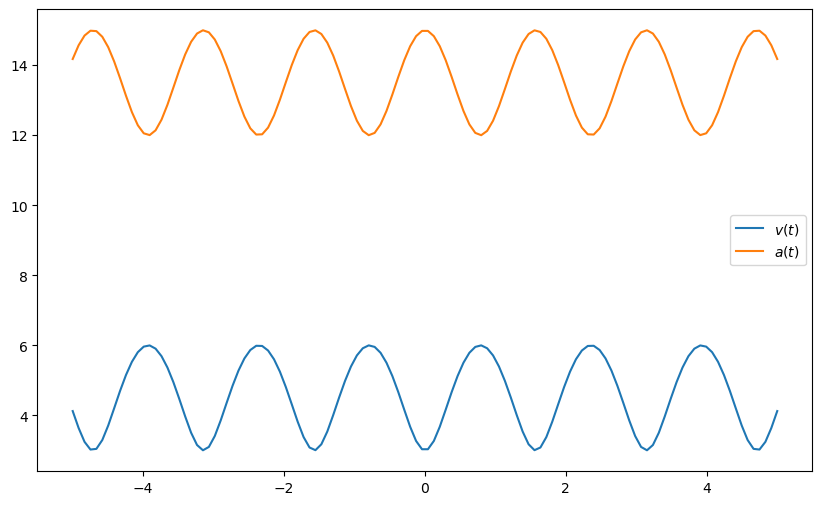

In [18]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as pltp
from matplotlib.animation import FuncAnimation, PillowWriter

scale = 2
time = np.linspace(-5, 5, 120)
t = sp.symbols('t')
O = sp.Matrix([3*sp.cos(2*t)*sp.cos(t) + 0.82, 3*sp.cos(2*t)*sp.sin(t)+0.82])

V = sp.diff(O, t)
a = sp.diff(V, t)
sp.pprint(V.norm())

at = a.dot(V)/V.norm() * V/V.norm()

an = a - at

fig, ax = plt.subplots()
ax.set_aspect("equal")
xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')


vecs = []

# Animation initialisation.
def init_task1():
    ax.set_xlim(-10 / scale, 10 / scale)
    ax.set_ylim(-10 / scale, 10 / scale)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.grid()
    plt.title('Scale: {}'.format(scale))
    return ln,

# Animation update on every frame.
def update_task1(frame):
    # substitute frame for time variable
    # in sympy objects
    Of = O.subs(t, frame)
    Vf = V.subs(t, frame)
    af = a.subs(t, frame)
    atf = at.subs(t, frame)
    anf = an.subs(t, frame)

    # Remove all the vectors on the graph.
    while len(vecs):
        vecs[-1].remove()
        vecs.pop()

    # Draw new vectors at the corresponding point.
    vecs.extend([
        plt.quiver([float(Of[0])], [float(Of[1])], [float(i[0])], [float(i[1])], units='xy', scale = 5, scale_units='xy', angles='xy', color=color)
        for i, color in zip([Vf, af, atf, anf], ['black', 'green', 'red', 'blue'])
    ])
    

    # Draw new point on the graph.
    xdata.append(Of[0])
    ydata.append(Of[1])
    ln.set_data(xdata, ydata)
    return ln,

# Create animation.
anim = FuncAnimation(fig, update_task1, frames=time, init_func=init_task1, blit=True)

from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)

plt.figure(figsize=(10,6))
Vg = sp.lambdify(t, V.norm(), 'numpy')
ag = sp.lambdify(t, a.norm(), 'numpy')
vVg = Vg(time)
vag = ag(time)
plt.plot(time, vVg, label='$v(t)$')
plt.plot(time, vag, label='$a(t)$')
plt.legend()
plt.show()

# Видео 3

Механизм состоит из ступенчатых колёс $1$, $2$, $3$, которые соприкасаются и соединены ременной передачей, стойки $4$ и груза $5$, привязанного к концу нити, которая намотана на одно из колёс.
    
Радиусы шагов колёс: у колеса $1$ — $r_1 = 2$, $R_1 = 4$; у колеса $2$ — $r_2 = 6$, $R_2 = 8$; у колеса $3$ — $r_3 = 12$, $R_3 = 16$. Точки $A$, $B$ и $C$ расположены на ободьях колёс.

Задан закон движения груза: $s_5 = t^3 - 6t$. Положительное направление для $s_5$ — вниз.

Задача:
1. Найти ($t=2$): скорости $A,\ C$; угловое ускорение $3$; ускорения $B$ и $4$.
2. Построить графики $V_a(t),\ V_c(t), \varepsilon_3(t),\ a_B(t),\ a_4(t)$, $t\in[0..10]$.
3. Написать алгоритм решения.

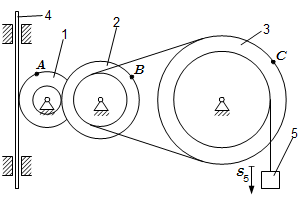

Изображение: Олег Буличев

угловое ускорение 3 = 1
скорость C = 8
ускорение B = 35.5555555555556
ускорение A = 156.444444444444
скорость A = 21.3333333333333


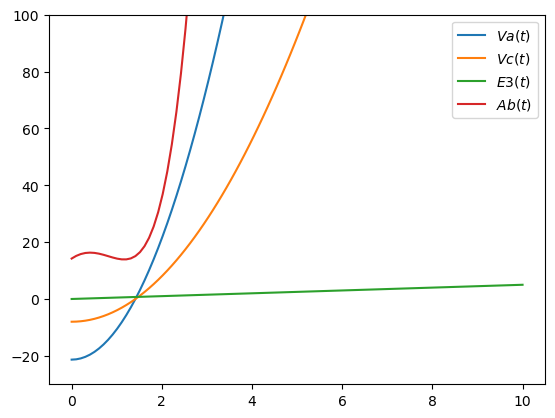

4/3

In [86]:
params = {
    'r1' : 2,
    'R1' : 4,
    'r2' : 6,
    'R2' : 8,
    'r3' : 12,
    'R3' : 16
}

t, r3, R3 = sp.symbols('t r3 R3' )
s = t**3-6*t
#наёдм скорость груза
Vs = sp.diff(s)
# скорость точки крепления нити равна скорости груза, найдём угловую скорость этой точки, 
# которая так же будет угловой скоростью С, т.к. в твердом теле угловые скорсти равны
wC = Vs/params['r3']
eC = sp.diff(wC)
eC3_value = eC.subs(t, 2)
print(f'угловое ускорение 3 = {eC3_value}')
vC = wC*params['R3']
vC_value = vC.subs(t, 2)
print(f'скорость C = {vC_value}')
#скорость малого колеса 2 будет равна скорости C, отсюда найдем угловую скорость и угловое ускорение 2 и B
wB = vC/params['r2']
eB = sp.diff(wB)

# ускорение ТТ это сумма нормального и касательного
aB = (wB**2*params['R2'] + eB*params['R2'])
print(f'ускорение B = {aB.subs(t, 2).evalf()}')
#скорость малого колеса А будет равна скорости точки В, аналогично найдём угловую скорость и угловое ускорение
vB = wB*params['R2']
wA = vB/params['r1']
eA = sp.diff(wA)
aA = (wA**2*params['R1'] + eA*params['R1']).subs(t, 2)
print(f'ускорение A = {aA.evalf()}')
vA = (wA*params['R1'])
print(f'скорость A = {vA.subs(t,2).evalf()}')

tx = np.linspace(0,10, 100)
fig, ax = plt.subplots()
vAn = sp.lambdify(t, vA, 'numpy')
vCn = sp.lambdify(t, vC, 'numpy')
eCn = sp.lambdify(t, eC, 'numpy')
aBn = sp.lambdify(t, aB, 'numpy')
ax.plot(tx, vAn(tx), label='$Va(t)$')
ax.plot(tx, vCn(tx), label='$Vc(t)$')
ax.plot(tx, eCn(tx), label='$E3(t)$')
ax.plot(tx, aBn(tx), label='$Ab(t)$')
ax.set_ylim(-30, 100)
plt.legend()
plt.show()
wB.subs(t,2)

In [88]:
eB.subs(t,2)

8/3

# Видео 4

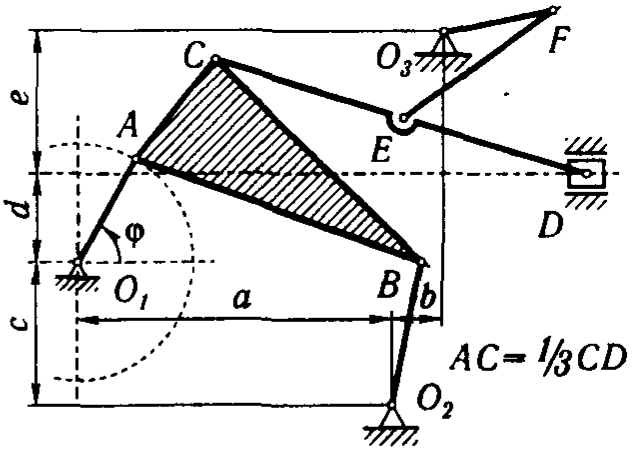


Схема: А. Яблонский / Сборник заданий для курсовых работ по теоретической механике. Высшая школа, 1978

Вы должны:
- смоделировать этот механизм (получить все положения);
- найти скорости для $A,\ B,\ C,\ E,\ F,\ D$;
- найти ускорения для $A$ и $B$;
- описать алгоритм решения задачи.
    
$\omega_{O_1A}=2$ рад/с; \\
$\phi=60^\circ;\ a=56;\ b=10;\ c=26;\ d=16;\ e=25$; \\
$O_1A=21;\ O_2B=25;\ O_3F=20;\ AB=54;\ BC=52;\\
CD=69;\ CE=35;\ EF=32.$

# Видео 5

Вы должны: \\
1. Смоделировать этот механизм (получить все положения).
2. Найти абсолютную, переносную и относительную скорости и ускорения для $M$.
3. Найти $t$, когда $M$ достигнет точки $A$.
4. Написать алгоритм решения.

$OM=s_r(t)=6\pi t^2$;

$\phi(t)=\frac{\pi t^3}{6}$;

$R=18,\ O_1O=O_2A=20$.

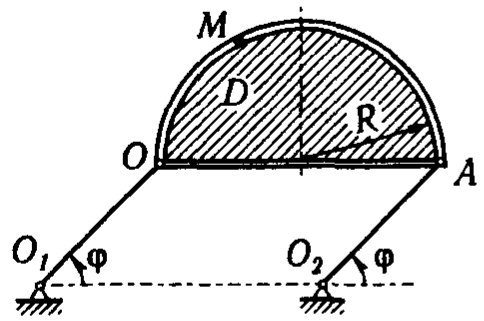

Схема: А. Яблонский / Сборник заданий для курсовых работ по теоретической механике. Высшая школа, 1978

# Видео 6

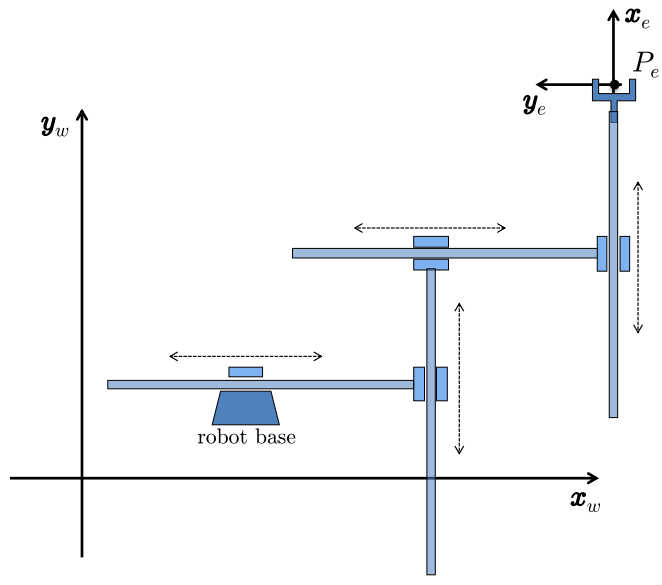


Изображение предоставлено А. Климчиком

Для данного манипулятора PPP:
1. Найти матрицу преобразований ($H$).
2. Решить прямую задачу кинематики (написать функцию, которая на вход принимает длины шарниров, а на выходе возвращает вектор $[x,y,\alpha]$.

*Подсказка.* Стоит обратить внимание на расположение последней системы координат.

3. Решить аналитически обратную задачу кинематики ($[x,y,\alpha] \rightarrow [l_1,\ l_2,\ l_3,\ l_4]$). Проверить её с помощью прямой кинематики (взять значения шарниров, подставить в FK, полученное значение FK подставить в IK; сравнить результат с изначальными значениями шарниров).
*Подсказка.* Подумайте, сколько уравнений необходимо для описания объекта на плоскости и сколько у вас неизвестных (количество шарниров). Что с этим можно сделать и какие у этого преимущества и недостатки?

# Видео 7

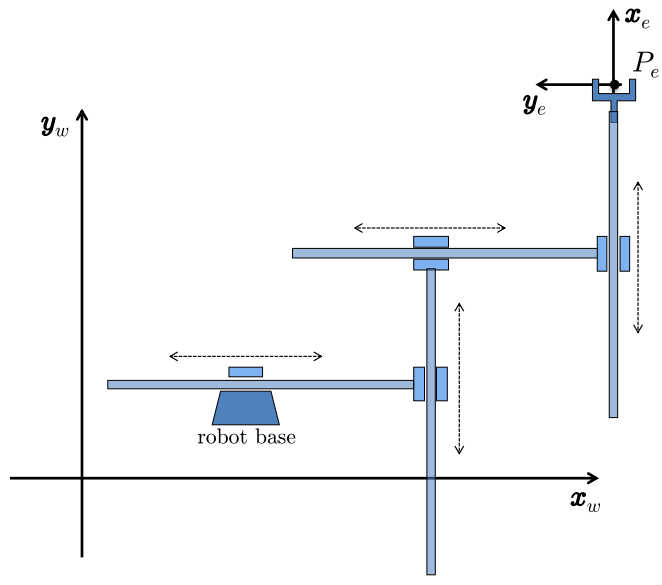

Изображение предоставлено А. Климчиком

Для манипулятора PPP:
1. Найти матрицу Якоби.
2. Сделать пример перехода из пространства шарниров в декартово пространство. Длины шарниров: $2,\ 3,\ 4,\ 8$.
3. Решить задачу обратной кинематики с помощью метода Ньютона. Для этого необходимо:
- посчитать прямую кинематику для некоторых значений длин шарниров;
- полученную прямую кинематику подставить в алгоритм;
- проверить полученные длины шарниров, подставив их в функцию прямой кинематики и сравнив с изначальным значением.